In [4]:
from fastai.vision import *
from fastai.widgets import *
import numpy as np
from pathlib import Path

In [5]:
np.random.seed(42)
path = Path('./data')

In [16]:
def create_ImageBunch(path):
    data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, \ #csv_labels='cleaned.csv', <- include this if data is cleaned (done in later step)
            ds_tfms=get_transforms(), size=224, num_workers=0, bs=16).normalize(imagenet_stats)
    return data


data = create_ImageBunch(path)

In [17]:
def train_model(data):
    learn = cnn_learner(data, models.resnet34, metrics=error_rate)
    learn.fit_one_cycle(4)
    learn.save('stage-1')
    return learn

learn = train_model(data)

epoch,train_loss,valid_loss,error_rate,time
0,0.580320,0.107795,0.026316,01:24
1,0.333049,0.023362,0.026316,01:19
2,0.227703,0.009075,0.000000,01:19
3,0.181223,0.008528,0.000000,01:18


In [7]:
def load_model(data, model_file):
    learn = cnn_learner(data, models.resnet34, metrics=error_rate)
    learn.load(model_file)
    return learn

learn = load_model(data, 'stage-1')

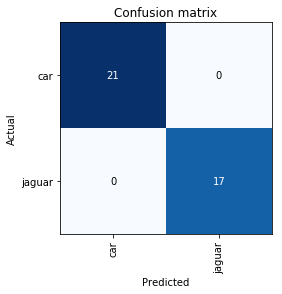

In [20]:
def interpret_model(learn):
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix()
    return

interpret_model(learn)

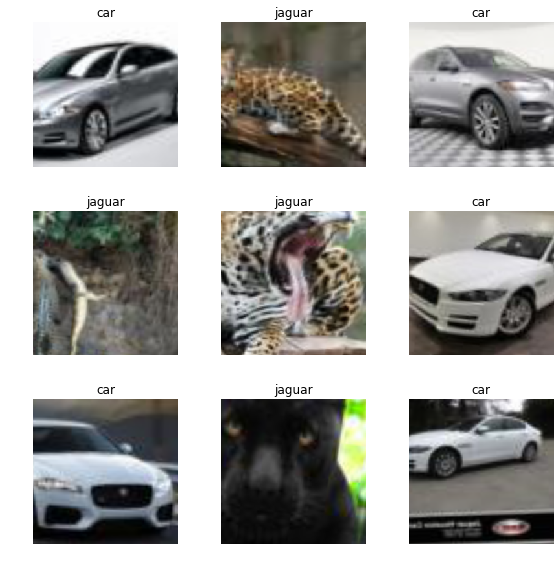

In [9]:
data.show_batch(rows=3, figsize=(8,8))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


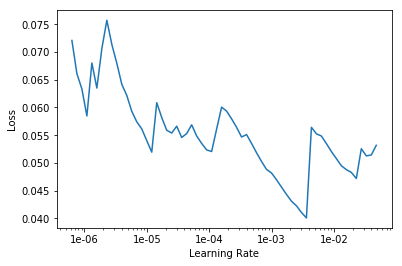

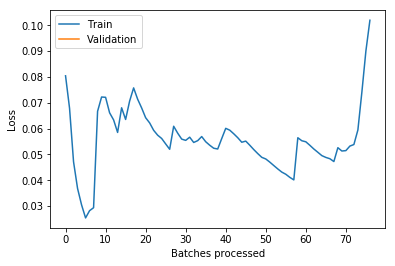

In [19]:
'''
plot losses and error rate
'''
def plot_stuff(learn):
    learn.lr_find()
    learn.recorder.plot()
    learn.recorder.plot_losses()
    return

plot_stuff(learn)

In [12]:
'''
change the slice based on the first graph from the above function
'''
def improve_fit(learn):
    learn.fit_one_cycle(4, max_lr=slice(2e-6,8e-4))
    learn.save('stage-1')
    return learn

learn = improve_fit(learn)

epoch,train_loss,valid_loss,error_rate,time
0,0.026551,0.053497,0.052632,01:08
1,0.039333,0.048259,0.052632,01:11
2,0.038030,0.050053,0.026316,01:10
3,0.031426,0.047986,0.052632,01:09


In [14]:
'''
Once dataset is cleaned RERUN create_ImageBunch to create the dataset and retrain model
'''
def clean_images(learn):
    ds, idxs = DatasetFormatter().from_toplosses(learn)
    ImageCleaner(ds, idxs, path)
    return

clean_images(learn)

'No images to show :)'

In [15]:
'''
Once dataset is cleaned RERUN create_ImageBunch to create the dataset and retrain model
'''
def remove_duplicates(learn):
    ds, idxs = DatasetFormatter().from_similars(learn)
    ImageCleaner(ds, idxs, path, duplicates=True)
    return

remove_duplicates(learn)

'No images to show :). 12 pairs were skipped since at least one of the images was deleted by the user.'

In [21]:
'''
This will create a file named 'export.pkl' in the directory where 
we were working that contains everything we need to deploy our model 
(the model, the weights but also some metadata like the classes or 
the transforms/normalization used).
'''

def export_model(learn):
    learn.export()

export_model(learn)

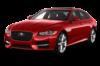

In [25]:
'''
Load a new image to test
'''
img = open_image(path/'car'/'00000001.png')
img

In [26]:
'''
Testing out the model from image previously loaded
'''
def test_model(img):
    learn = load_learner(path)
    pred_class,pred_idx,outputs = learn.predict(img)
    return pred_class

test_model(img)

Category car